<a href="https://colab.research.google.com/github/vrjayaprakash/Model/blob/main/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install  --upgrade gensim -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 69.5 MB/s eta 0:00:00


In [2]:
!pip install matplotlib -q


In [3]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import string

In [4]:
np.random.seed(42)

In [5]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [6]:
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [7]:
wv.save('word2vec-google-news-300')

In [8]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [9]:
wv['apple']

array([-0.06445312, -0.16015625, -0.01208496,  0.13476562, -0.22949219,
        0.16210938,  0.3046875 , -0.1796875 , -0.12109375,  0.25390625,
       -0.01428223, -0.06396484, -0.08056641, -0.05688477, -0.19628906,
        0.2890625 , -0.05151367,  0.14257812, -0.10498047, -0.04736328,
       -0.34765625,  0.35742188,  0.265625  ,  0.00188446, -0.01586914,
        0.00195312, -0.35546875,  0.22167969,  0.05761719,  0.15917969,
        0.08691406, -0.0267334 , -0.04785156,  0.23925781, -0.05981445,
        0.0378418 ,  0.17382812, -0.41796875,  0.2890625 ,  0.32617188,
        0.02429199, -0.01647949, -0.06494141, -0.08886719,  0.07666016,
       -0.15136719,  0.05249023, -0.04199219, -0.05419922,  0.00108337,
       -0.20117188,  0.12304688,  0.09228516,  0.10449219, -0.00408936,
       -0.04199219,  0.01409912, -0.02111816, -0.13476562, -0.24316406,
        0.16015625, -0.06689453, -0.08984375, -0.07177734, -0.00595093,
       -0.00482178, -0.00089264, -0.30664062, -0.0625    ,  0.07

In [10]:
len(wv['apple'])

300

In [11]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load('word2vec-google-news-300')

In [12]:
wv.similarity('apple', 'fruit')

np.float32(0.6410147)

In [13]:
wv.similarity('apple', 'car')

np.float32(0.12830707)

In [14]:
pairs = [
    ('car', 'minivan'),
    ('car', 'bicycle'),
    ('car', 'airplane'),
    ('car', 'cereal'),
    ('car', 'communism')
]

In [15]:
for w1, w2 in pairs:
  print('%r\t%r\t%.2f'%(w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


In [16]:
print(wv.most_similar(positive = ['car', 'minivan'], topn = 5))

[('SUV', 0.8532192707061768), ('vehicle', 0.8175783753395081), ('pickup_truck', 0.7763688564300537), ('Jeep', 0.7567334175109863), ('Ford_Explorer', 0.7565720081329346)]


In [17]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'car']))

car


In [18]:
print(wv.most_similar(positive = ['woman', 'king'], negative = ['man'], topn = 5))

[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321839332581)]


In [19]:
print(wv.most_similar(positive = ['car', 'bike'], negative = ['airplane'], topn = 5))

[('scooter', 0.6521791219711304), ('bicycle', 0.6501272320747375), ('bikes', 0.6385384798049927), ('motorcycle', 0.5930512547492981), ('motorbike', 0.5782894492149353)]


In [20]:
print(wv.most_similar(positive = ['woman', 'king'], topn = 3))

[('man', 0.6628609299659729), ('queen', 0.6438563466072083), ('girl', 0.6136074066162109)]


In [21]:
words = ['one', 'two', 'man', 'woman', 'table']

In [22]:
sample_vectors = np.array([wv[word] for word in words])
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
result = pca.fit_transform(sample_vectors)
result

array([[-0.41775945, -0.906729  ],
       [-0.52036536, -1.3947775 ],
       [ 1.2547548 ,  0.3259122 ],
       [ 1.6043063 ,  0.64717937],
       [-1.920937  ,  1.328415  ]], dtype=float32)

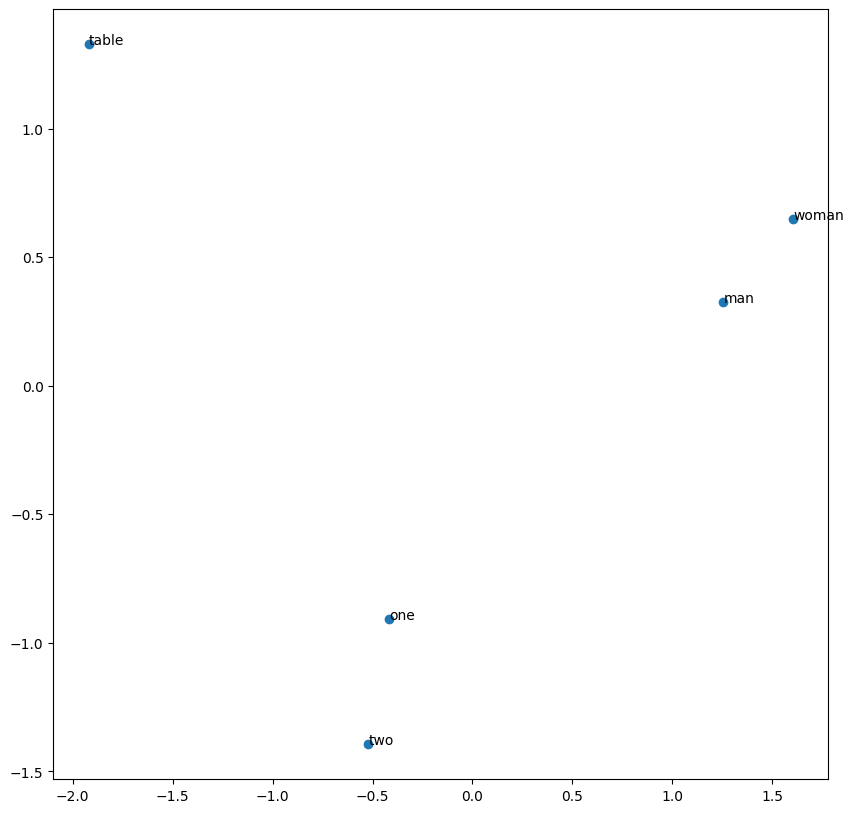

In [23]:
plt.figure(figsize = (10, 10))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
  plt.annotate(word, xy = (result[i, 0], result[i, 1]))
plt.show()


In [24]:
data = pd.read_csv("/content/toxicity_en.csv")

In [25]:
data.head()

,text,is_toxic
0,"Elon Musk is a piece of shit, greedy capitalis...",Toxic
1,The senile credit card shrill from Delaware ne...,Toxic
2,He does that a lot -- makes everyone look good...,Toxic
3,F*ck Lizzo,Toxic
4,Epstein and trump were best buds!!! Pedophiles...,Toxic


In [26]:
def sent_vec(sent):
  vector_size = wv.vector_size
  wv_res = np.zeros(vector_size)
  ctr = 1
  for w in sent:
    if w in wv:
      ctr += 1
      wv_res += wv[w]
  wv_res = wv_res / ctr
  return wv_res

In [27]:
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'became', 'sometimes', 'be', 'towards', 'but', 'first', 'my', '’ll', 'might', 'we', 'both', 'himself', 'beyond', 'others', 'latterly', 'whose', "'re", 'even', 'several', 'most', 'give', 'upon', '’d', 'yours', 'since', 'must', '’ve', 'done', 'elsewhere', 'why', 'on', 'amongst', 'behind', 'this', 'with', 'the', 'yourselves', 'none', 'four', 'that', 'under', 'whereupon', 'last', 'them', 'whom', 'whither', 'many', 'ca', 'no', 'show', 'nobody', 'becomes', 'us', '‘d', 'indeed', 'although', '’re', 'thru', 'me', 'still', 'few', 'ten', 'of', 'now', 'which', '‘re', 'serious', 'forty', 'else', 'for', "'ve", 'our', 'anyone', 'by', 'make', 'whether', 'could', 'front', 'and', 'as', 'anywhere', 'thus', 'everything', 'where', 'cannot', 'mine', 'afterwards', 'become', 'other', 'a', 'ever', 'any', 'hereby', 'per', 'will', 'was', 'noone', 'am', 'top', 'such', 'seemed', 'across', 'empty', 'enough', 'it', 'into', 'further', 'does', 'becoming', 'whatever', 'who', 'yet', 'not', 'least', 'amount', 'thereby',

In [28]:
punctuation = string.punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [29]:
def spacy_tokenizer(sentence):
  doc = nlp(sentence)

  mytoken = [word.lemma_.lower().strip()for word in doc]

  mytoken = [word for word in mytoken if word not in stop_words and word not in punctuation]
  return mytoken

In [30]:
sentence = "I love learning nlp" and "I love learning machine learning"
spacy_tokenizer(sentence)

['love', 'learn', 'machine', 'learning']

In [31]:
sent_vec("i am happy")

array([-1.27999442e-01,  1.07666016e-01, -7.53348214e-03,  1.87116350e-01,
       -8.23277065e-02, -2.47105190e-02, -1.03759766e-01,  4.23409598e-02,
       -2.33939035e-02,  3.37611607e-02, -8.05664062e-02, -1.64341518e-01,
       -1.49675642e-01,  3.05524554e-02, -8.99135045e-02,  9.39592634e-02,
       -1.41950335e-02,  2.79087612e-01, -2.28794643e-02, -6.53730120e-02,
       -2.90597098e-01, -9.01162284e-02,  7.07833426e-02,  4.44684710e-03,
       -5.56815011e-02, -5.58035714e-02, -3.37053571e-01,  1.08036586e-01,
       -4.94559152e-02, -4.90635463e-02,  7.13239397e-02, -2.77273996e-02,
       -1.16860526e-01, -1.16280692e-01, -2.30085100e-01,  7.45849609e-02,
       -2.01102121e-01,  1.96149554e-01, -7.36083984e-02,  7.71833147e-02,
        7.90056501e-02, -7.97642299e-02, -2.58963449e-02,  1.32114955e-01,
        1.00516183e-01, -4.13921901e-03, -6.21512277e-02, -1.57156808e-01,
       -5.28041295e-02,  3.25230190e-02, -1.32899693e-01,  2.23981585e-01,
       -2.59486607e-02,  

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['is_toxic'] = le.fit_transform(data['is_toxic'])

In [33]:
data['tokens'] = data['text'].apply(spacy_tokenizer)

In [34]:
data.head()

,text,is_toxic,tokens
0,"Elon Musk is a piece of shit, greedy capitalis...",1,"[elon, musk, piece, shit, greedy, capitalist, ..."
1,The senile credit card shrill from Delaware ne...,1,"[senile, credit, card, shrill, delaware, need,..."
2,He does that a lot -- makes everyone look good...,1,"[lot, --, look, good, ..., guess, probably, de..."
3,F*ck Lizzo,1,"[f*ck, lizzo]"
4,Epstein and trump were best buds!!! Pedophiles...,1,"[epstein, trump, good, bud, pedophile, play]"


In [35]:
data['vec'] = data['tokens'].apply(sent_vec)

In [36]:
data.head()

,text,is_toxic,tokens,vec
0,"Elon Musk is a piece of shit, greedy capitalis...",1,"[elon, musk, piece, shit, greedy, capitalist, ...","[0.006749306955645161, 0.009988107988911291, -..."
1,The senile credit card shrill from Delaware ne...,1,"[senile, credit, card, shrill, delaware, need,...","[-0.02324676513671875, 0.01446533203125, 0.012..."
2,He does that a lot -- makes everyone look good...,1,"[lot, --, look, good, ..., guess, probably, de...","[0.109130859375, 0.021326700846354168, 0.01735..."
3,F*ck Lizzo,1,"[f*ck, lizzo]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Epstein and trump were best buds!!! Pedophiles...,1,"[epstein, trump, good, bud, pedophile, play]","[-0.08299763997395833, 0.014689127604166666, -..."


In [37]:
X = data['vec'].to_list()
y = data['is_toxic'].to_list()

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [44]:
from sklearn.linear_model import LogisticRegression


In [47]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [48]:
from sklearn import metrics

In [49]:
print("Logistic Regression:", metrics.accuracy_score(y_test, y_pred))
print("Logistic Regression:", metrics.precision_score(y_test, y_pred))
print("Logistic Regression:", metrics.recall_score(y_test, y_pred))


Logistic Regression: 0.89
Logistic Regression: 0.90625
Logistic Regression: 0.87
